# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari "Kaggle" (Dataset Kesejahteraan Pekerja Indonesia)
   Isi File ZIP
  
  garisKemiskinan.csv

  pengeluaran.csv

  pendidikan.csv

  kesehatan.csv

  tenagaKerja.csv

2. **Ketentuan Dataset**:
  Data yang akan digunakan "pengeluaran.csv"
  

  Deskripsi: Dataset ini berisi informasi tentang pengeluaran per kapita di berbagai daerah di Indonesia berdasarkan kategori pengeluaran.

  Jumlah Baris: 4.620

  Fitur yang Tersedia:

  Kategorikal: provinsi, daerah, jenis
  
  Numerikal: tahun, pengeluaran

  Label/Kelas: Tidak ada

  Kegunaan: Cocok untuk clustering karena memiliki kombinasi fitur kategorikal dan numerikal.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Upload file ZIP
uploaded = files.upload()

# Ekstrak file ZIP
zip_file = next(iter(uploaded))
extract_folder = "/content/extracted_data"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("File berhasil diekstrak ke:", extract_folder)


Saving archive (1).zip to archive (1).zip
File berhasil diekstrak ke: /content/extracted_data


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. Memahami Struktur Data**

In [ ]:
# Load dataset pengeluaran.csv
file_path = "/content/extracted_data/pengeluaran.csv"
df = pd.read_csv(file_path)

# Tampilkan jumlah baris & kolom
print("Jumlah Baris dan Kolom:", df.shape)

# Tampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Tampilkan beberapa baris awal
print("\n5 Baris Pertama Dataset:")
print(df.head())

Jumlah Baris dan Kolom: (4620, 5)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB
None

5 Baris Pertama Dataset:
  provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0


**Insight **:
Dataset pengeluaran.csv berisi data pengeluaran per kapita di berbagai daerah dari tahun ke tahun. Secara umum, terdapat tren peningkatan pengeluaran yang mungkin dipengaruhi oleh inflasi atau faktor ekonomi lainnya. Pengeluaran juga dibagi berdasarkan wilayah (perkotaan dan pedesaan) dan jenis (makanan dan nonmakanan) yang mungkin menunjukkan adanya perbedaan pola konsumsi masyarakat. Namun, terdapat 108 baris dengan nilai kosong pada kolom peng, sehingga harus ditangani terlebih dahulu sebelum dilanjutkan dengan analisis. Dengan kombinasi data numerik dan kategorikal, dataset ini cocok untuk dilakukan klasterisasi guna mengelompokkan daerah berdasarkan pola pengeluarannya.

**2. Menangani Data yang Hilang**

In [ ]:
# Mengecek jumlah data yang hilang
print(df.isnull().sum())

# Mengisi nilai yang hilang di kolom 'peng' dengan median
df['peng'] = df['peng'].fillna(df['peng'].median())

# Memastikan tidak ada missing values lagi
print(df.isnull().sum())


provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64


**Insigt**: Dari hasil penanganan missing value, terlihat bahwa kolom "peng" yang awalnya kosong, kini telah terisi dengan median. Setelah proses ini, semua kolom pada dataset menjadi lengkap tanpa ada nilai yang hilang.

**3. Analisis Distribusi dan Korelasi**

Statistik Deskriptif:
             tahun          peng
count  4620.000000  4.620000e+03
mean   2015.045455  5.993192e+05
std       4.416124  3.484733e+05
min    2007.000000  5.921600e+04
25%    2011.750000  3.528985e+05
50%    2015.000000  5.206945e+05
75%    2019.000000  7.527372e+05
max    2022.000000  2.525347e+06


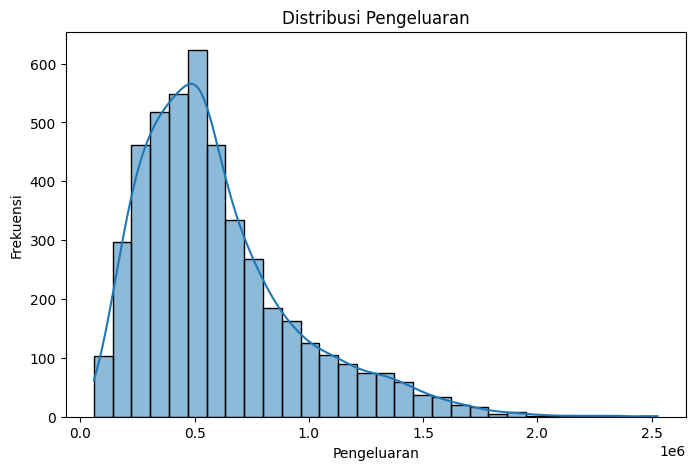

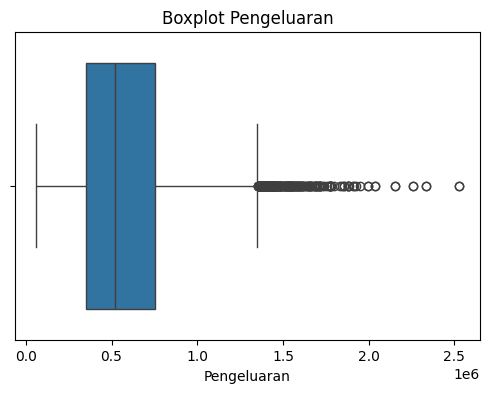

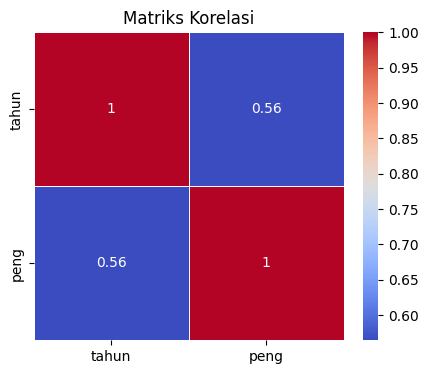

In [ ]:
# Statistik deskriptif untuk variabel numerik
print("Statistik Deskriptif:")
print(df.describe())

# Histogram untuk variabel numerik
plt.figure(figsize=(8, 5))
sns.histplot(df['peng'], bins=30, kde=True)
plt.title('Distribusi Pengeluaran')
plt.xlabel('Pengeluaran')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['peng'])
plt.title('Boxplot Pengeluaran')
plt.xlabel('Pengeluaran')
plt.show()

# Matriks korelasi hanya untuk kolom numerik
plt.figure(figsize=(5, 4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()



**Insight** Distribusi pengeluaran menunjukkan mayoritas data berada di kisaran rendah dengan beberapa nilai tinggi sebagai outlier. Korelasi antara tahun dan pengeluaran sebesar 0,56 menunjukkan adanya tren peningkatan pengeluaran seiring waktu.

**4. Visualisasi Data**

<ipython-input-6-046a4a2c5ef1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='provinsi', order=df['provinsi'].value_counts().index, palette='viridis')


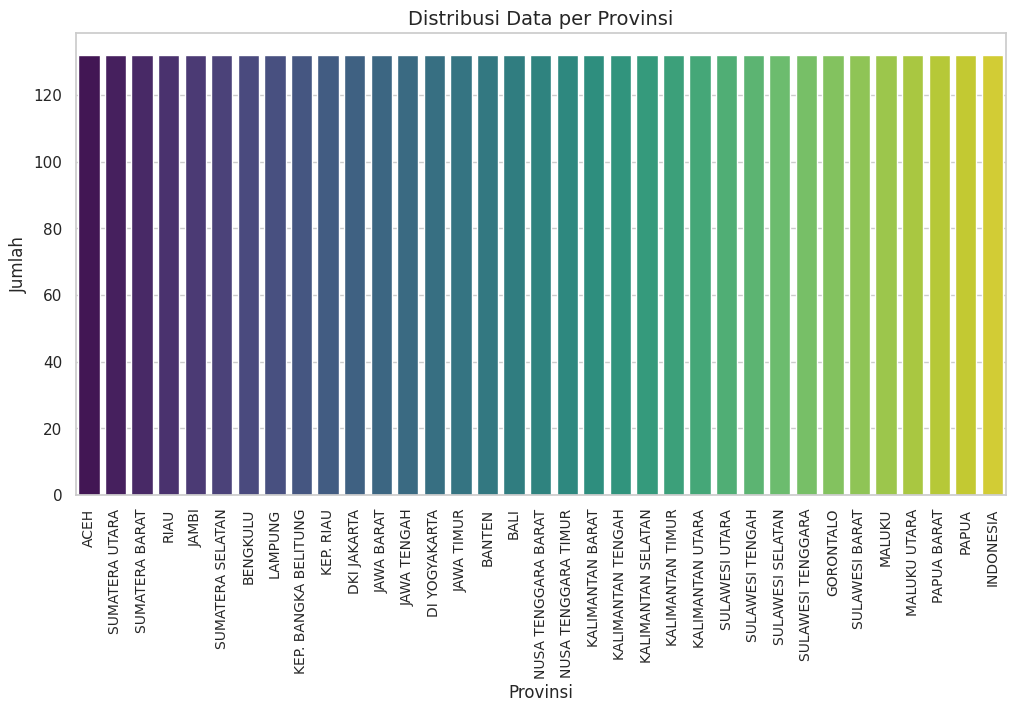

<ipython-input-6-046a4a2c5ef1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='jenis', order=df['jenis'].value_counts().index, palette='coolwarm')


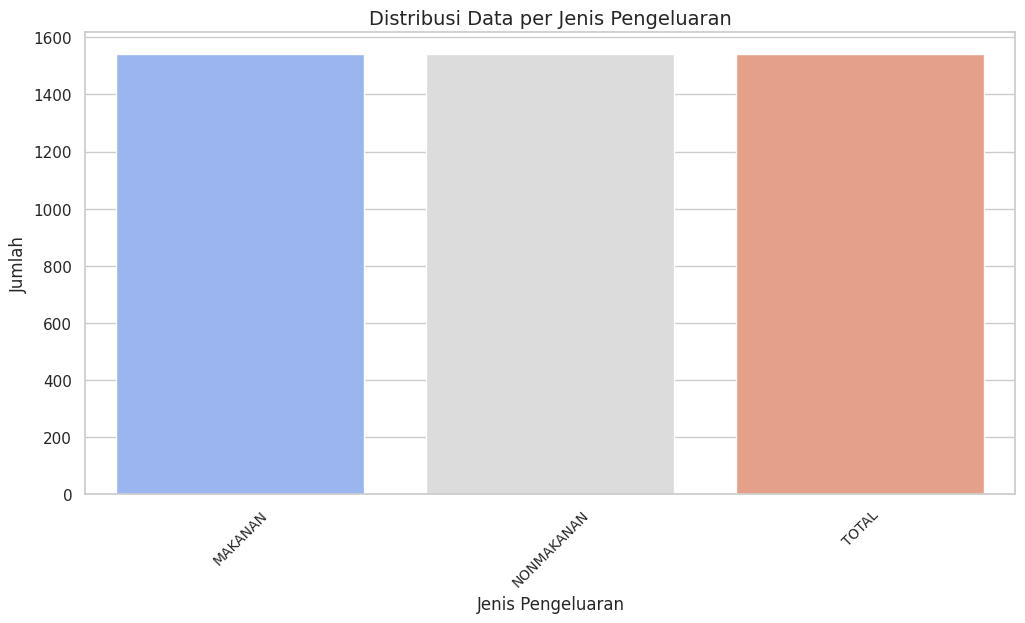

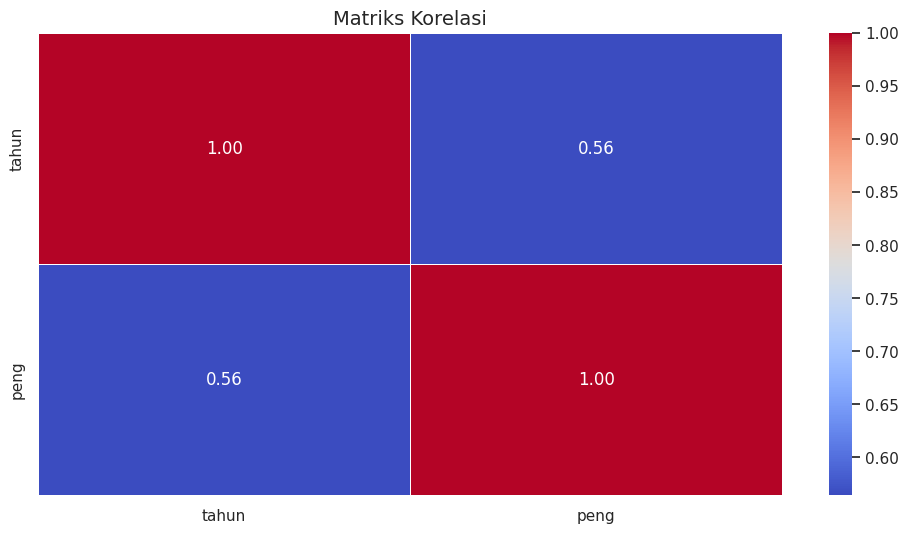

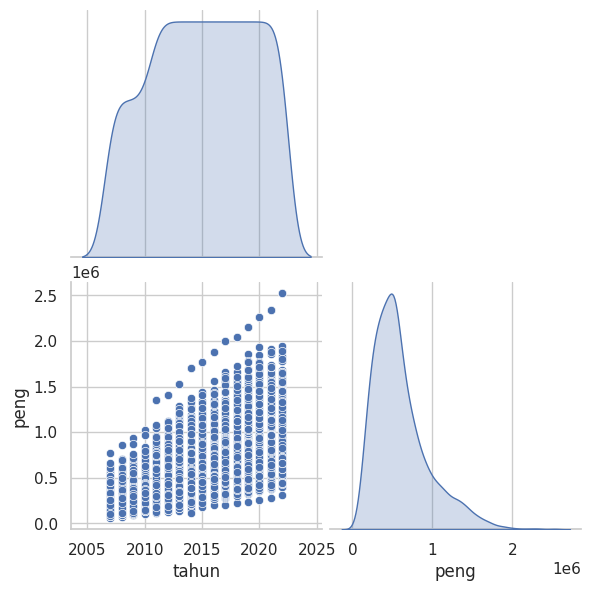

In [ ]:
# Mengatur style seaborn
sns.set(style="whitegrid")

# Diagram batang untuk Provinsi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='provinsi', order=df['provinsi'].value_counts().index, palette='viridis')
plt.xticks(rotation=90, fontsize=10)  # Menambah ukuran font
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('Distribusi Data per Provinsi', fontsize=14)
plt.show()

# Diagram batang untuk Jenis Pengeluaran
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='jenis', order=df['jenis'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Jenis Pengeluaran', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('Distribusi Data per Jenis Pengeluaran', fontsize=14)
plt.show()

# Heatmap Korelasi untuk variabel numerik
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Matriks Korelasi', fontsize=14)
plt.show()

# Pairplot untuk hubungan antar variabel numerik
sns.pairplot(numeric_df, diag_kind='kde', corner=True, height=3)
plt.show()


**Insight :**menunjukkan bahwa pengeluaran masyarakat cenderung meningkat dari waktu ke waktu, dengan korelasi positif antara tahun dengan jumlah pengeluaran. Hal ini dapat disebabkan oleh inflasi atau daya beli yang meningkat. Selain itu, sebaran data di setiap provinsi cukup merata, tidak ada satu daerah yang mendominasi secara signifikan. Secara keseluruhan pengeluaran pada kategori makanan dan non-makanan hampir berimbang. Visualisasi tersebut juga menunjukkan bahwa sebagian besar data memiliki nilai pengeluaran yang relatif rendah, meskipun ada beberapa outlier dengan nilai yang sangat tinggi. Secara keseluruhan, tren ini mencerminkan adanya peningkatan kebutuhan atau harga barang dari tahun ke tahun.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Cek missing value**

In [ ]:
print(df.columns)


Index(['provinsi', 'daerah', 'jenis', 'tahun', 'peng'], dtype='object')


In [ ]:
# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print(missing_values)

provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64


In [ ]:
# Pastikan kolom 'peng_standardized_log' ada sebelum digunakan
if 'peng_standardized_log' not in df.columns:
    df['peng_standardized_log'] = np.log1p(df['peng'])  # Transformasi log

# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Missing values sebelum pengisian:\n", missing_values)

# Menangani missing values jika ada
df['peng_standardized_log'].fillna(df['peng_standardized_log'].median(), inplace=True)

# Konfirmasi bahwa tidak ada missing values setelah pengisian
missing_values_after = df.isnull().sum()
print("Missing values setelah pengisian:\n", missing_values_after)

Missing values sebelum pengisian:
 provinsi                 0
daerah                   0
jenis                    0
tahun                    0
peng                     0
peng_standardized_log    0
dtype: int64
Missing values setelah pengisian:
 provinsi                 0
daerah                   0
jenis                    0
tahun                    0
peng                     0
peng_standardized_log    0
dtype: int64


<ipython-input-9-98457d5e39c4>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peng_standardized_log'].fillna(df['peng_standardized_log'].median(), inplace=True)


In [ ]:
# Mengecek ulang setelah menangai data kosong
df.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,0
peng_standardized_log,0


**Menghapus Data Duplikat**

In [ ]:
df.drop_duplicates(inplace=True)
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")


Jumlah data setelah menghapus duplikat: 4620


**Melakukan normalisasi**

In [ ]:
# Normalisasi
num_cols = ['peng', 'tahun', 'peng_standardized_log']


if 'peng_standardized_log' not in df.columns:
    df['peng_standardized_log'] = np.log1p(df['peng'])


scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].describe()

,peng,tahun,peng_standardized_log
count,4620.000000,4620.000000,4620.000000
mean,0.219008,0.536364,0.573435
std,0.141304,0.294408,0.155675
min,0.000000,0.000000,0.000000
25%,0.119086,0.316667,0.475622
50%,0.187127,0.533333,0.579270
75%,0.281218,0.800000,0.677474
max,1.000000,1.000000,1.000000


**Deteksi dan Penanganan Outlier**

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan jumlah outlier per kolom
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
print(outliers)


peng                     210
tahun                      0
peng_standardized_log     42
dtype: int64


In [ ]:
# Menentukan batas outlier setelah standarisasi
Q1 = df['peng_standardized_log'].quantile(0.25)
Q3 = df['peng_standardized_log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Ganti outlier dengan median setelah standarisasi
median_value = df['peng_standardized_log'].median()
df.loc[(df['peng_standardized_log'] < lower_bound) | (df['peng_standardized_log'] > upper_bound), 'peng_standardized_log'] = median_value


**Binning (Pengelompokan Data)**

In [ ]:
# Membuat kategori berdasarkan quantile
df['peng_category'] = pd.cut(df['peng_standardized_log'],
                             bins=[df['peng_standardized_log'].min(),
                                   df['peng_standardized_log'].quantile(0.33),
                                   df['peng_standardized_log'].quantile(0.66),
                                   df['peng_standardized_log'].max()],
                             labels=['Rendah', 'Sedang', 'Tinggi'])

# Melihat distribusi kategori
print(df['peng_category'].value_counts())


peng_category
Tinggi    1571
Rendah    1524
Sedang    1524
Name: count, dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Pilih jumlah cluster yang sudah ditentukan
k = 4  # Gunakan 4 cluster sesuai hasil terbaik
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Lakukan clustering
df['Cluster'] = kmeans.fit_predict(df[['peng_standardized_log', 'tahun']])

# Tampilkan jumlah data per cluster
df['Cluster'].value_counts()



,count
Cluster,
0,1321
1,1233
3,1208
2,858


In [ ]:
print(f"Jumlah data sebelum menghapus duplikat: {df.shape[0]}")
df.drop_duplicates(inplace=True)


Jumlah data sebelum menghapus duplikat: 4620


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

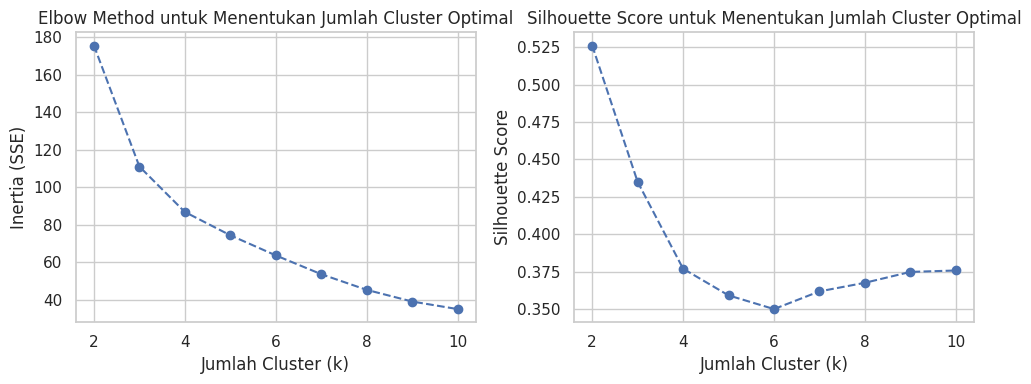

In [ ]:
# Mencoba beberapa nilai k
range_clusters = range(2, 11)
inertia = []
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df[['peng_standardized_log', 'tahun']])

    inertia.append(kmeans.inertia_)  # Simpan nilai inertia
    silhouette_scores.append(silhouette_score(df[['peng_standardized_log', 'tahun']], labels))
df['cluster'] = kmeans.predict(df[['peng_standardized_log', 'tahun']])

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, 'o--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, 'o--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')

plt.tight_layout()
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

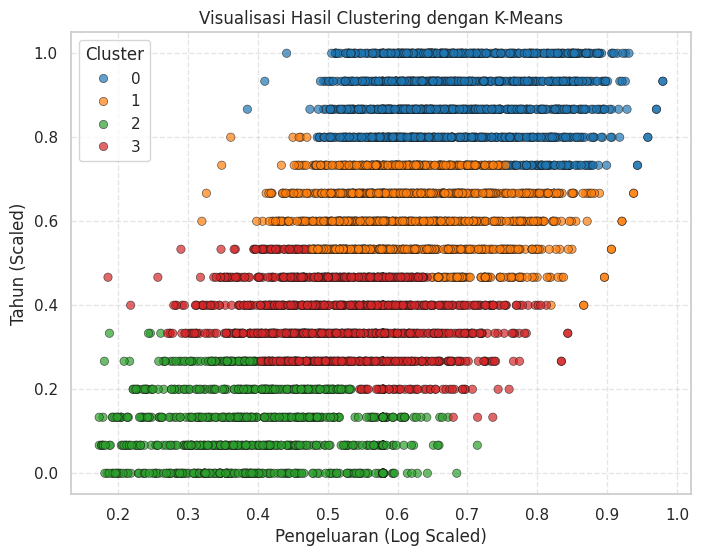

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['peng_standardized_log'], y=df['tahun'], hue=df['Cluster'], palette='tab10', alpha=0.7, edgecolor='k')

plt.xlabel("Pengeluaran (Log Scaled)")
plt.ylabel("Tahun (Scaled)")
plt.title("Visualisasi Hasil Clustering dengan K-Means")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Load ulang file asli (dari zip tadi)
df_original = pd.read_csv("/content/extracted_data/pengeluaran.csv")

# Melakukan preprocessing
df_original = df_original.dropna()
df_original['peng_log'] = np.log1p(df_original['peng'])

# Fit scaler pada data asli (pastikan kolom yang digunakan sama saat fit dan transform)
scaler = MinMaxScaler()
scaler.fit(df_original[['peng', 'tahun', 'peng_log']])

# Normalisasi data untuk clustering (harus menggunakan 3 kolom seperti saat fit)
df = df_original.copy()
df[['peng_standardized_log', 'tahun', 'peng_log']] = scaler.transform(df[['peng', 'tahun', 'peng_log']])

# Pilih jumlah cluster yang sudah ditentukan
k = 4  # Gunakan 4 cluster sesuai hasil terbaik
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Lakukan clustering
df['Cluster'] = kmeans.fit_predict(df[['peng_standardized_log', 'tahun', 'peng_log']])

# Pastikan hasil cluster hanya memiliki 4 kategori
print("Cluster yang terbentuk:", df['Cluster'].unique())

# Inverse transform hanya pada kolom yang telah dinormalisasi
df[['peng', 'tahun', 'peng_log']] = scaler.inverse_transform(
    df[['peng_standardized_log', 'tahun', 'peng_log']]
)

# Gabungkan hasil clustering ke dataset asli
df_original['Cluster'] = df['Cluster']

# Hitung ulang summary cluster
cluster_summary_real = df_original.groupby('Cluster')[['peng', 'tahun']].mean().reset_index()

# Cetak hasil summary cluster
print("\n Summary Cluster Setelah Inverse Transform:")
print(cluster_summary_real)


Cluster yang terbentuk: [0 2 3 1]

 Summary Cluster Setelah Inverse Transform:
   Cluster          peng        tahun
0        0  2.796907e+05  2009.353207
1        1  1.253903e+06  2019.111441
2        2  5.433798e+05  2013.796810
3        3  6.012182e+05  2019.417829


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

#Cluster 0
**Pengeluaran Rata-rata:** Rp 279.690

**Tahun Rata-rata**: 2009

**Analisis:** Klaster ini memiliki perolehan terendah dibandingkan dengan klaster lainnya. Pelanggan di klaster ini bergabung sekitar tahun 2009, yang menunjukkan bahwa mereka adalah pengguna lama. Ada kemungkinan bahwa pelanggan ini kurang aktif atau hanya melakukan transaksi sesekali.

#Cluster 1
**Pengeluaran Rata-rata**: Rp 1.253.903

**Tahun Rata-rata**: 2019

**Analisis:** Klaster ini memiliki pengeluaran tertinggi dibandingkan dengan klaster lainnya.Sebagian besar pelanggan bergabung sekitar tahun 2019, yang menunjukkan bahwa mereka adalah nasabah baru.Mereka kemungkinan masih sangat aktif dan memiliki daya beli yang tinggi.

#Cluster 2
**Pengeluaran Rata-rata:** Rp 543.380

**Tahun Rata-rata:** 2013

**Analisis:** Klaster ini memiliki pengeluaran sedang—lebih rendah dari Klaster 1 tetapi lebih tinggi dari Klaster 0. Pelanggan bergabung sekitar tahun 2013, yang menunjukkan bahwa mereka telah menggunakan layanan ini cukup lama. Mereka mungkin pelanggan setia yang masih aktif tetapi tidak sebesar pelanggan di Klaster 1 dalam hal pengeluaran.


#Cluster 3

**Pengeluaran Rata-rata:** Rp 601.218

**Tahun Rata-rata:** 2019

**Analisis:**Klaster ini memiliki pengeluaran yang hampir setara dengan Klaster 2, tetapi lebih tinggi.Pelanggan bergabung sekitar tahun 2019, yang berarti mereka relatif baru. Mereka mungkin sedang dalam fase eksplorasi layanan atau hanya menggunakan layanan dalam jumlah sedang.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil clustering
df_original.to_csv("hasil_clustering.csv", index=False)
print("\n Dataset berhasil disimpan")


 Dataset berhasil disimpan
